# 텐서플로우를 사용한 Image Augmentation

## 1. Flip

### 준비하기
[mycat.jpg](https://d3s0tskafalll9.cloudfront.net/media/documents/mycat.jpg)

In [1]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = os.getenv('HOME')+'/aiffel/data_augmentation/images/mycat.jpg'
sample_img_path

'/aiffel/aiffel/data_augmentation/images/mycat.jpg'

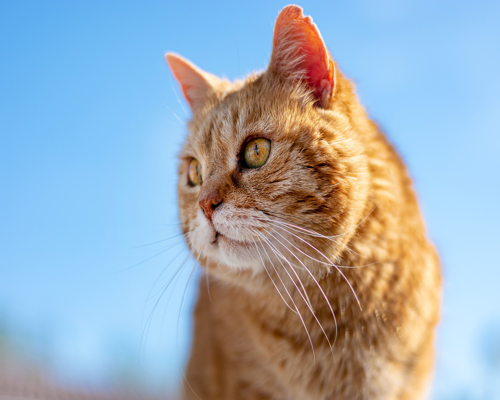

In [2]:
image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

### Flip 해보기

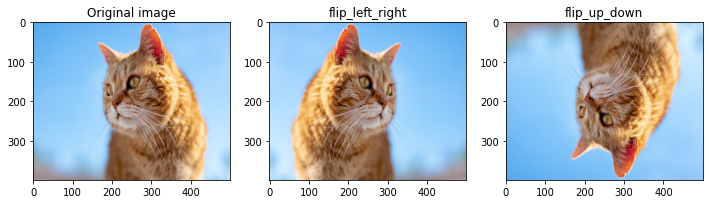

In [3]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(12, 12))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

plt.show()

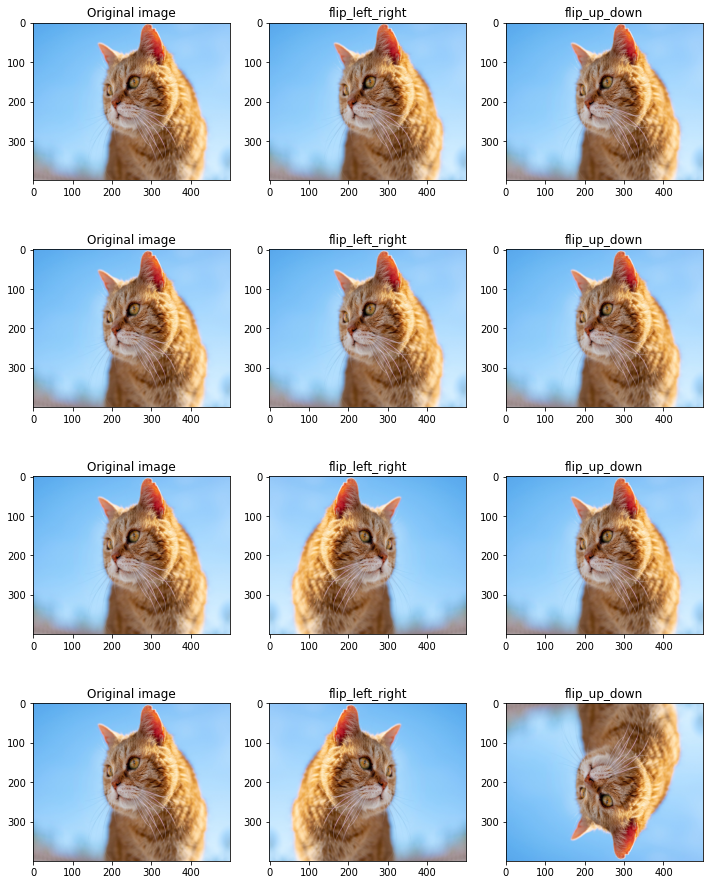

In [4]:
plt.figure(figsize=(12, 16))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

## 2. Center Crop
1.0인 경우는 원본 이미지와 같습니다. 그러나 예를 들어 고양이 이미지를 확대하면 0.5까지는 보일 수 있지만 0.25 수준으로 내려가면 털만 보이고 고양이의 형상을 찾기 어려울 수 있습니다. 

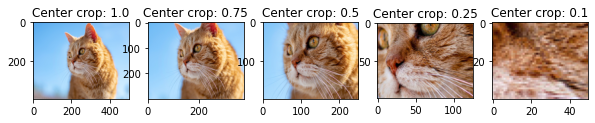

In [5]:
plt.figure(figsize=(12, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

In [6]:
def random_central_crop(image_tensor, range=(0, 1)):
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor
print('=3')

=3


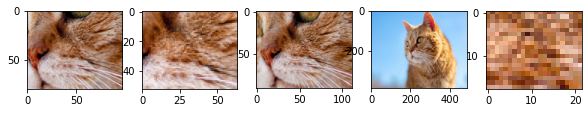

In [7]:
plt.figure(figsize=(12, 15))

col = 5
for i, frac in enumerate(central_fractions):
    cropped_tensor =random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

## 3. tf.image.random_crop()
*  [tf.image.random_crop](https://www.tensorflow.org/api_docs/python/tf/image/random_crop) 

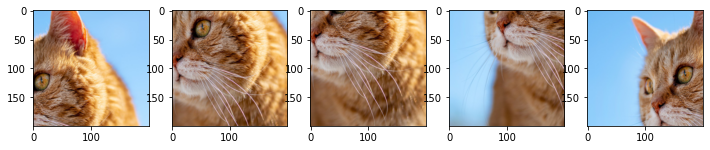

In [8]:
# display 5 random cropped images
plt.figure(figsize=(12, 15))

for i in range(5):
    random_crop_tensor = tf.image.random_crop(image_tensor, [200,200,3])
    random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)
    plt.subplot(1, 5, i+1)
    plt.imshow(random_crop_image)

## 4. tf.image.random_brightness()
*  [tf.image.random_brightness](https://www.tensorflow.org/api_docs/python/tf/image/random_brightness) 

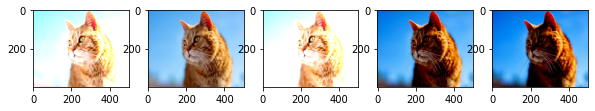

In [9]:
plt.figure(figsize=(12, 15))

col = 5
for i in range(5):
    random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
    random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
    random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

    plt.subplot(1,col+1,i+1)
    plt.imshow(random_bright_image)

# imgaug 라이브러리

In [10]:
import numpy as np
import imgaug.augmenters as iaa

image_arr = np.array(image)
image_arr.shape

(400, 500, 3)

## 1. iaa.Affine()
*  [2D 변환 (Transformations)](https://darkpgmr.tistory.com/79) 

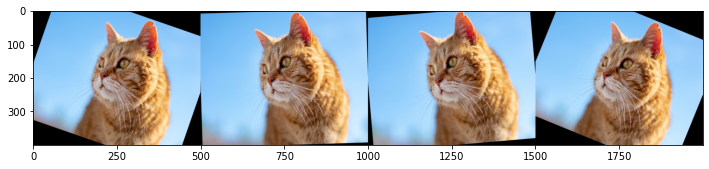

In [11]:
images = [image_arr, image_arr, image_arr, image_arr]

rotate = iaa.Affine(rotate=(-25, 25))
images_aug = rotate(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

## 2. iaa.Crop()

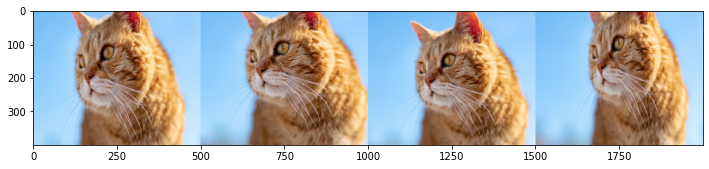

In [12]:
images = [image_arr, image_arr, image_arr, image_arr]

crop = iaa.Crop(percent=(0,0.2))
images_aug = crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

## 3. iaa.Sequential()

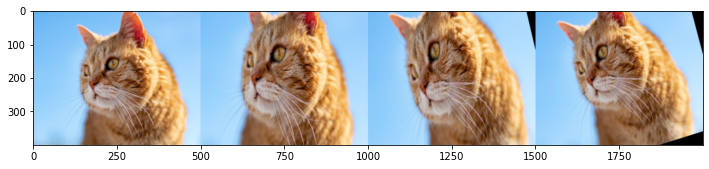

In [13]:
images = [image_arr, image_arr, image_arr, image_arr]

rotate_crop = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.Crop(percent=(0, 0.2))
])
images_aug = rotate_crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

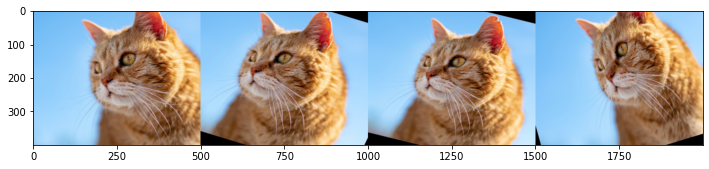

In [14]:
# random_order를 이용하여 기법 순서 바꾸기
images = [image_arr, image_arr, image_arr, image_arr]

rotate_crop = iaa.Sequential([
    iaa.Crop(percent=(0, 0.2)),
    iaa.Affine(rotate=(-25, 25)),
], random_order=True)
images_aug = rotate_crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

## 4. iaa.OneOf()

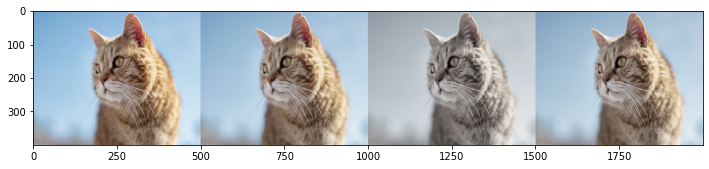

In [15]:
images = [image_arr, image_arr, image_arr, image_arr]

seq = iaa.OneOf([
     iaa.Grayscale(alpha=(0.0, 1.0)),
     iaa.AddToSaturation((-50, 50))
])
images_aug = seq(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

## 5. iaa.Sometimes()
*  [iaa.Sometimes()](https://imgaug.readthedocs.io/en/latest/source/overview/meta.html#sometimes) 

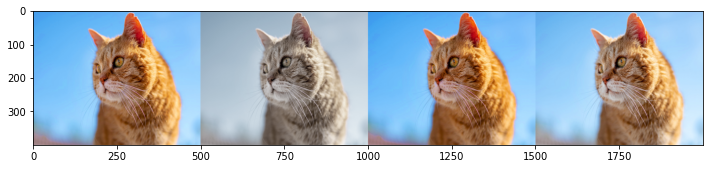

In [22]:
# Use iaa.SomeTimes with AddToSaturation & Grayscale
images = [image_arr, image_arr, image_arr, image_arr]

seq = iaa.Sequential([
    iaa.Sometimes(
        0.6,
        iaa.AddToSaturation((-50, 50))
    ),
    iaa.Sometimes(
        0.2,
        iaa.Grayscale(alpha=(0.0, 1.0))
    )
])
images_aug = seq(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

# 조합될 수 있는 가짓수 1024가지가 넘도록 해보기

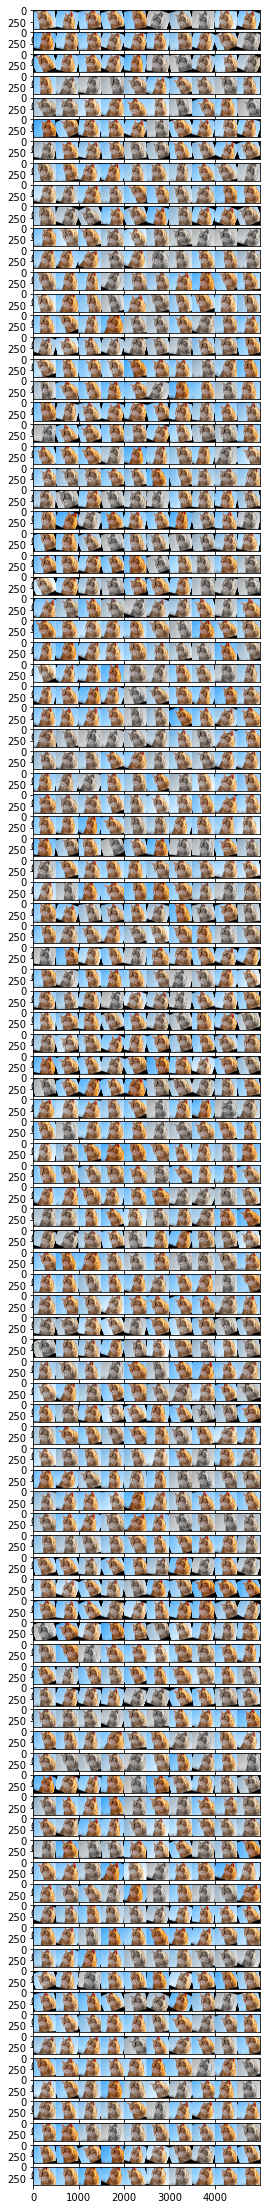

In [25]:
# Use various techniques and functions in imgaug library. Make at least 1,024 images and show 100 images.
seq = iaa.Sequential([
    iaa.OneOf([
         iaa.Grayscale(alpha=(0.0, 1.0)),
         iaa.Sometimes(
             0.5,
             iaa.AddToSaturation((-50, 50))
         )
    ]),
    iaa.Sequential([
        iaa.Crop(percent=(0, 0.2)),
        iaa.Affine(rotate=(-25, 25)),
    ], random_order=True)
])

plt.figure(figsize=(12, 40))
for i in range(100):
    images = [image_arr]*10
    images_aug = seq(images=images)
    plt.subplot(100,1,i+1)
    plt.imshow(np.hstack(images_aug))
    
plt.show()